In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
#データの読み込み
df = pd.read_csv("ds_salaries.csv")

work_year 給料が支払われた年

experience_level その年の職務における経験レベル（エントリーレベル/ジュニアレベル等）

emplyment_type 雇用形態

job_title 職種

salary 給与総額

salary_currency 給与_通貨

salary_in_usd 給与をドルで換算したもの

employee_residence 従業員の居住国

remote_ratio リモートで行われた作業の割合

company_location 本店または契約支社

compant_size その年に会社で働いていた平均人数

In [4]:
#データの確認
df.head()

,Unnamed: 0,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,0,2020,MI,FT,Data Scientist,70000,EUR,79833,DE,0,DE,L
1,1,2020,SE,FT,Machine Learning Scientist,260000,USD,260000,JP,0,JP,S
2,2,2020,SE,FT,Big Data Engineer,85000,GBP,109024,GB,50,GB,M
3,3,2020,MI,FT,Product Data Analyst,20000,USD,20000,HN,0,HN,S
4,4,2020,SE,FT,Machine Learning Engineer,150000,USD,150000,US,50,US,L


In [5]:
#データサイズの確認
print(df.shape)

(607, 12)


In [8]:
#欠損値の確認
df.isnull().sum()

Unnamed: 0            0
work_year             0
experience_level      0
employment_type       0
job_title             0
salary                0
salary_currency       0
salary_in_usd         0
employee_residence    0
remote_ratio          0
company_location      0
company_size          0
dtype: int64

In [26]:
#weork_yearの値を確認
df["work_year"].unique()

array([2020, 2021, 2022])

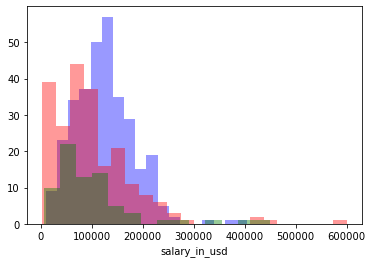

In [36]:
#salary_in_usdで給与の幅を確認
df_2022 = df[df["work_year"]==2022]
sns.distplot(df_2022["salary_in_usd"],kde=False,color="blue")

df_2021 = df[df["work_year"]==2021]
sns.distplot(df_2021["salary_in_usd"],kde=False,color="red")

df_2020 = df[df["work_year"]==2020]
sns.distplot(df_2020["salary_in_usd"],kde=False,color="green")

色が汚いけど...
2020年から2022年まで山が右側に徐々に移動していることが伺える。
山の頂上が2020年は50,000付近に対して2022年は150,000付近となっている。
2021年と比較しても大きく右にずれていることからここ1年で急速に給料が上がっていることが伺える。
ちなみに、150,000ドルは日本円換算で2,000万超え...

In [100]:
#給料が2021年と比べて増加している職業を確認
df["work_year"] = df["work_year"].astype("str")
tmp = df.pivot_table(df, index="job_title", columns="work_year").reset_index()

#columnsを書き換え
tmp.columns = ['_'.join(col) for col in tmp.columns]
#indexのMultiIndexをreset
tmp = tmp.reset_index()

#増減率を計算
tmp["rate_change"] = (tmp["salary_in_usd_2022"] - tmp["salary_in_usd_2021"]) / tmp["salary_in_usd_2021"]

In [101]:
tmp

,index,job_title_,Unnamed: 0_2020,Unnamed: 0_2021,Unnamed: 0_2022,remote_ratio_2020,remote_ratio_2021,remote_ratio_2022,salary_2020,salary_2021,salary_2022,salary_in_usd_2020,salary_in_usd_2021,salary_in_usd_2022,rate_change
0,0,3D Computer Vision Researcher,NaN,77.000000,NaN,NaN,50.000000,NaN,NaN,4.000000e+05,NaN,NaN,5409.000000,NaN,NaN
1,1,AI Scientist,52.000000,182.500000,498.500000,50.000000,100.000000,50.000000,300000.000000,3.535000e+05,1.600000e+05,45896.000000,24263.250000,160000.000000,5.594335
2,2,Analytics Engineer,NaN,NaN,458.250000,NaN,NaN,50.000000,NaN,NaN,1.750000e+05,NaN,NaN,175000.000000,NaN
3,3,Applied Data Scientist,NaN,102.500000,517.666667,NaN,25.000000,100.000000,NaN,7.400000e+04,2.380000e+05,NaN,82137.500000,238000.000000,1.897580
4,4,Applied Machine Learning Scientist,NaN,144.500000,497.500000,NaN,75.000000,100.000000,NaN,2.307000e+05,5.200000e+04,NaN,230700.000000,53437.500000,-0.768368
5,5,BI Data Analyst,23.000000,123.000000,NaN,0.000000,80.000000,NaN,98000.000000,2.262854e+06,NaN,98000.000000,70106.200000,NaN,NaN
6,6,Big Data Architect,NaN,255.000000,NaN,NaN,50.000000,NaN,NaN,1.250000e+05,NaN,NaN,99703.000000,NaN,NaN
7,7,Big Data Engineer,16.666667,187.000000,NaN,83.333333,30.000000,NaN,85000.000000,6.770000e+05,NaN,97690.333333,24544.200000,NaN,NaN
8,8,Business Data Analyst,18.000000,279.000000,484.500000,100.000000,100.000000,75.000000,117500.000000,5.000000e+04,7.450000e+05,117500.000000,59102.000000,44677.000000,-0.244070
9,9,Cloud Data Engineer,NaN,122.000000,NaN,NaN,75.000000,NaN,NaN,1.400000e+05,NaN,NaN,124647.000000,NaN,NaN


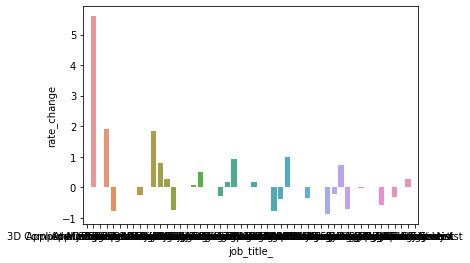

In [103]:
#job_titleごとの増減率 見にくい
sns.barplot(data = tmp, x="job_title_", y="rate_change")

In [109]:
#job_titleごとの増減率 見にくい上位5位まで表示
tmp[["job_title_","rate_change"]].sort_values(by="rate_change",ascending=False).head()

,job_title_,rate_change
1,AI Scientist,5.594335
3,Applied Data Scientist,1.897580
10,Computer Vision Engineer,1.831534
30,Head of Data Science,1.009615
22,Data Scientist,0.926825


AIサイエンティストの給料が２０２１年と比較して5.5％増加している

In [42]:
#2022年、国によって給料に差があるか確認
df_2022.groupby("company_location").agg({"salary_in_usd":"mean"}).reset_index().sort_values(by="salary_in_usd")

,company_location,salary_in_usd
15,LU,10000.000000
19,PK,20000.000000
5,CZ,31875.000000
8,EE,32974.000000
20,PL,35590.000000
14,IN,36884.500000
17,MY,40000.000000
21,PT,40119.000000
12,GR,54126.222222
9,ES,59537.000000


アメリカが平均給与が高く、一番低い国はルクセンブルク大公国となっており、差は130,000以上となる。
２番目に高い国はスイス、ついでオーストラリアとなっている。

In [43]:
#ちなみに日本は？
df[df["company_location"]=="JP"]

,Unnamed: 0,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
1,1,2020,SE,FT,Machine Learning Scientist,260000,USD,260000,JP,0,JP,S
16,16,2020,EN,FT,Data Engineer,4450000,JPY,41689,JP,100,JP,S
136,136,2021,MI,FT,ML Engineer,7000000,JPY,63711,JP,50,JP,S
137,137,2021,MI,FT,ML Engineer,8500000,JPY,77364,JP,50,JP,S
150,150,2021,SE,FT,Director of Data Science,168000,USD,168000,JP,0,JP,S
189,189,2021,MI,FT,Machine Learning Engineer,74000,USD,74000,JP,50,JP,S


データ数が6件しかないため判断はできないが上は200,000以上もらっているため上下の幅が大きくみえる。

In [50]:
#jobによる給料の差を全体とUSで比較してみる
job = df_2022.groupby("job_title").agg({"salary_in_usd":"median","salary":"count"}).reset_index().rename(columns={"salary":"count"}).sort_values(by="salary_in_usd")
job

,job_title,salary_in_usd,count
8,Data Analytics Engineer,20000.0,1
24,ML Engineer,21983.0,1
29,NLP Engineer,37236.0,1
4,Business Data Analyst,44677.0,2
3,Applied Machine Learning Scientist,53437.5,2
17,ETL Developer,54957.0,2
27,Machine Learning Infrastructure Engineer,58255.0,1
13,Data Science Engineer,60000.0,1
5,Computer Vision Engineer,67500.0,2
30,Principal Data Analyst,75000.0,1


当然だが職責が上がるごとに給料は上がっている。
データアーキテクト、分析エンジニア、AIサイエンティストあたりの給料は高いと考えられる。
一方でビジネスデータアナリストなどは平均的に給料が低いと考えられる。
データアナリスト、ビジネスデータアナリスト間など言葉の定義によっては同一職種を指すものもある。
本来であれば表記の揺れを治す必要がありそう。
各職種に対する件数が少ないためあくまで参考程度にとどまる。

In [57]:
#アメリカの職種別給料
job_us = df_2022[df_2022["company_location"]=="US"].groupby("job_title").agg({"salary_in_usd":"median","salary":"count"}).reset_index().rename(columns={"salary":"count"}).sort_values(by="salary_in_usd")
job_us

,job_title,salary_in_usd,count
17,NLP Engineer,37236.0,1
3,Applied Machine Learning Scientist,75000.0,1
12,Financial Data Analyst,100000.0,1
5,Data Analyst,112900.0,56
4,Computer Vision Engineer,125000.0,1
7,Data Analytics Manager,127140.0,4
18,Research Scientist,132000.0,2
11,Data Scientist,140850.0,60
9,Data Engineer,147500.0,64
16,Machine Learning Scientist,153000.0,3


データアーキテクト、機械学習エンジニアなどが高い

In [60]:
#件数が比較的多い職種に絞ってもうちょっとみていく（データアナリスト、データサイエンティスト、データエンジニア）
df_job = df_2022[(df_2022["job_title"]=="Data Analyst") | (df_2022["job_title"]=="Data Scientist") | (df_2022["job_title"]=="Data Engineer")]

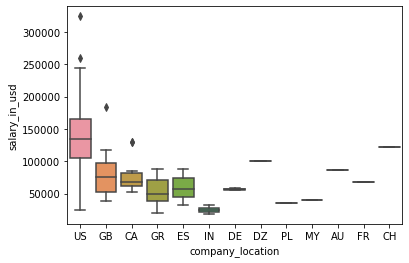

In [61]:
#国ごとの給料のレンジを把握
sns.boxplot(data=df_job,x="company_location",y="salary_in_usd")

ES以降は件数が少なく特徴を考えづらいが、アメリカは給料のレンジが非常に大きい

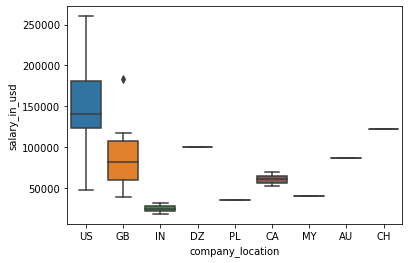

In [64]:
#さらに職種を絞りみていく
df_s = df_2022[df_2022["job_title"]=="Data Scientist"]
sns.boxplot(data=df_s,x="company_location",y="salary_in_usd")

データサイエンティストに絞ってみてもレンジの幅は大きい。
アメリカに絞って給料を大きく分けるポイントについて調べる。

In [65]:
#カラムを表示
df_s.columns

Index(['Unnamed: 0', 'work_year', 'experience_level', 'employment_type',
       'job_title', 'salary', 'salary_currency', 'salary_in_usd',
       'employee_residence', 'remote_ratio', 'company_location',
       'company_size'],
      dtype='object')

In [66]:
#国をUSに絞る
df_us = df_s[df_s["company_location"]=="US"]

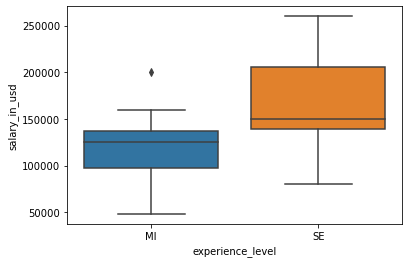

In [67]:
#まずは職務レベルで確認
sns.boxplot(data=df_us,x="experience_level",y="salary_in_usd")

MI（マテリアルズ・インフォマティクス）よりSEの方が約５０,０００ほど高い

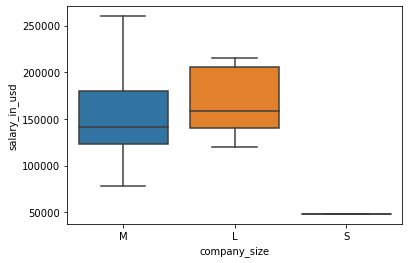

In [113]:
#職場の大きさで比較
sns.boxplot(data=df_us, x="company_size", y="salary_in_usd")

S:従業員50名未満
M:50~250名未満
L:250名以上

結構特徴的で、Sが極端に少ない。そもそもデータ数が少ないためSサイズの企業ではデータサイエンティストがいない可能性もある。
Mでは給料の最大値と最小値の差が大きい。
Lでは給料の四部位範囲はMより若干高い水準となっているが飛び抜けて高い給料を支払っている会社はない。


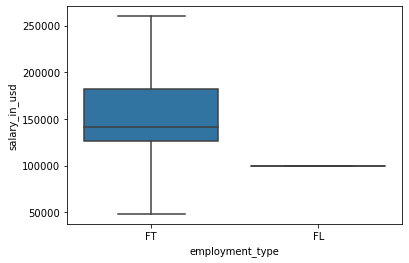

In [115]:
#雇用形態で確認
sns.boxplot(data=df_us,x="employment_type",y="salary_in_usd")

FL:フリーランス
FT:フルタイム

雇用形態にはパートなどもあるがアメリカではフルタイムかフリーランスしかいなかった
フリーランスは100,000とフルタイムの中央値より低い値となっている。


＃まとめ
今回はデータサイエンスの給料データを可視化しながら眺めてみました。
データサイエンスが高い給料をもらうための要素としては下記の3点が重要と感じた。
・目指すキャリア（プレイヤーではなくマネジメント方向へのキャリア設計）
・企業の大きさ（安定を求めるなら従業員の多い大企業へ、一発逆転を狙うなら従業員が50~２５０人未満の企業へ）
・どこの国で働くか（アメリカ）

アメリカの給料を見ると数千万円レベルの給料が支払われており、アメリカの方が給料高い説は本当なんだなと感じた。一方で日本でも高い給料をもらっている事例も見受けられたため、自身のスキルによっては十分アメリカに匹敵する給料をもらうことも不可能ではないと感じた。
また、マネジメント方向ではなくプレイヤーとして活躍し高い給料を目指すのであればデータアーキテクトが良いと感じた。